<a href="https://colab.research.google.com/github/sekanson/Python-random-scripts/blob/main/Prize_Distrubution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Lib

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_rows', 500)

Variables

In [ ]:
num_of_players = 100
total_prize_pool = 10000
min_score = 0
max_score = 100

In [ ]:
# percentage of total prize pool: [top, med, low]
# numbers should sum to 1
tier_pool = [0.35, 0.6, 0.05]

# tier max / tier average
# should be greater than 1.0, but not too great such that min of one tier will be less than the max of the tier below
tier_max_avg_ratio = 1.2

In [ ]:
prize_table = pd.DataFrame(index=range(num_of_players), columns=['Rank', 'Score', 'Tier', 'Prize Percentage', 'Prize'])

Sample Player Scores

In [ ]:
mean = 50
std = 20

In [ ]:
scores = np.random.normal(mean, std, num_of_players)

In [ ]:
scores = [min(max_score, max(min_score, int(x))) for x in scores]

In [ ]:
prize_table['Score'] = scores

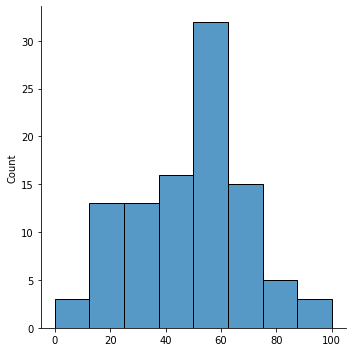

In [ ]:
ax = sns.displot(scores)

Prize

In [ ]:
average = np.mean(prize_table['Score'])
standard_deviation = np.std(prize_table['Score'])

print('Average:', average)
print('Standard Deviation:', standard_deviation)

Average: 48.82
Standard Deviation: 21.062943763871186


In [ ]:
for i in range(num_of_players):
  prize_table.iloc[i, 2] = 'Top' if prize_table.iloc[i, 1] > average + standard_deviation else ('Low' if prize_table.iloc[i, 1] < average - standard_deviation else 'Med')

In [ ]:
prize_table = prize_table.sort_values('Score', ascending=False)

In [ ]:
tier_groupby = prize_table.groupby('Tier').count()

In [ ]:
num_low = tier_groupby.loc['Low', 'Score']
num_med = tier_groupby.loc['Med', 'Score']
num_top = tier_groupby.loc['Top', 'Score']
tier_count = np.array([num_top, num_med, num_low])

In [ ]:
tier_avg = np.array(tier_pool) / tier_count
tier_high = tier_avg * tier_max_avg_ratio
tier_diff = 2 * (np.array(tier_pool) / tier_count - tier_high) / (tier_count - np.ones(len(tier_pool)))

In [ ]:
counter = 0
for i in range(num_of_players):
  if i > 0 and prize_table.iloc[i-1, 2] != prize_table.iloc[i, 2]:
    counter = 0
  if prize_table.iloc[i, 2] == 'Top':
    prize_table.iloc[i, 3] = tier_high[0] + counter * tier_diff[0]
  elif prize_table.iloc[i, 2] == 'Med':
    prize_table.iloc[i, 3] = tier_high[1] + counter * tier_diff[1]
  else:
    prize_table.iloc[i, 3] = tier_high[2] + counter * tier_diff[2]
  prize_table.iloc[i, 4] = int(prize_table.iloc[i, 3] * 10000)
  counter += 1

In [ ]:
prize_table['Prize Percentage'] = prize_table['Prize Percentage'].astype(np.float64)
prize_table['Prize'] = prize_table['Prize'].astype(np.int64)

In [ ]:
# fix rounding errors

prize_diff = total_prize_pool - prize_table['Prize'].sum()
if prize_diff > 0:
  row_count = 0
  while prize_diff > 0:
    prize_table.iloc[row_count, 4] += 1
    prize_diff -= 1
    row_count += 1
    if row_count >= num_of_players:
      row_count = 0
elif prize_diff < 0:
  row_count = num_of_players - 1
  while prize_diff < 0:
    prize_table.iloc[row_count, 4] -= 1
    prize_diff += 1
    row_count -= 1
    if row_count < 0:
      row_count = num_of_players - 1

Results

In [ ]:
prize_table['Rank'] = range(1, num_of_players + 1)

In [ ]:
prize_table

,Rank,Score,Tier,Prize Percentage,Prize
52,1,100,Top,0.028000,280
85,2,100,Top,0.027333,274
73,3,96,Top,0.026667,267
35,4,81,Top,0.026000,260
47,5,80,Top,0.025333,254
11,6,79,Top,0.024667,247
10,7,77,Top,0.024000,240
83,8,75,Top,0.023333,234
27,9,73,Top,0.022667,227
89,10,73,Top,0.022000,221


In [ ]:
prize_groupby = prize_table[['Tier', 'Prize']].groupby('Tier').sum()
prize_groupby['Percentage'] = prize_groupby['Prize'].apply(lambda x : x / total_prize_pool)

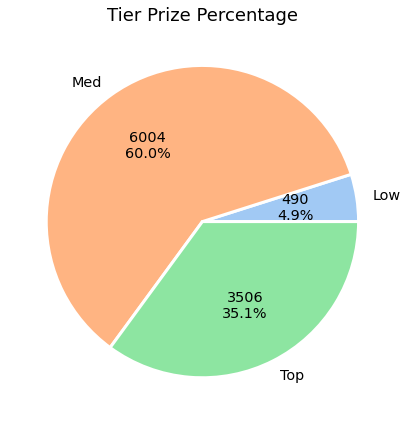

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

colors = sns.color_palette('pastel')[0:5]
patches, texts, pcts = ax.pie(
    prize_groupby['Prize'], 
    labels=prize_groupby.index.values.tolist(), 
    colors=colors, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})
for i in range(3):
  pcts[i].set_text(str(prize_groupby.iloc[i, 0]) + "\n" + pcts[i].get_text())
ax.set_title('Tier Prize Percentage', fontsize=18)
plt.tight_layout()

In [ ]:
if prize_table['Prize'].sum() == total_prize_pool:
  print('Prize distribution check passed.')
elif prize_table['Prize'].sum() > total_prize_pool:
  print('Too much prize distributed.')
else:
  print('Not all prize distributed.')

Prize distribution check passed.
